In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
Test=pd.read_csv('Titanic_Test.csv')

In [ ]:
Train=pd.read_csv('Titanic_Train.csv')

In [ ]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Train=Train.drop(['PassengerId','Name','SibSp','Parch','Embarked','Ticket','Cabin'],axis='columns')
Test=Test.drop(['PassengerId','Name','SibSp','Parch','Embarked','Ticket','Cabin'],axis='columns')

In [ ]:
Train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
mv1=Train.isnull().sum()
mv2=Test.isnull().sum()

In [ ]:
mv1

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [ ]:
data_no_mv = Train.dropna(axis=0)
data_no_mv.describe(include='all')

,Survived,Pclass,Sex,Age,Fare
count,714.000000,714.000000,714,714.000000,714.000000
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,male,NaN,NaN
freq,NaN,NaN,453,NaN,NaN
mean,0.406162,2.236695,NaN,29.699118,34.694514
std,0.491460,0.838250,NaN,14.526497,52.918930
min,0.000000,1.000000,NaN,0.420000,0.000000
25%,0.000000,1.000000,NaN,20.125000,8.050000
50%,0.000000,2.000000,NaN,28.000000,15.741700
75%,1.000000,3.000000,NaN,38.000000,33.375000


In [ ]:
mv2

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [ ]:
data_no_mv2 = Test.dropna(axis=0)
data_no_mv2.describe(include='all')

,Pclass,Sex,Age,Fare
count,331.000000,331,331.000000,331.000000
unique,NaN,2,NaN,NaN
top,NaN,male,NaN,NaN
freq,NaN,204,NaN,NaN
mean,2.141994,NaN,30.181269,40.982087
std,0.846251,NaN,14.104573,61.228558
min,1.000000,NaN,0.170000,0.000000
25%,1.000000,NaN,21.000000,8.050000
50%,2.000000,NaN,27.000000,16.000000
75%,3.000000,NaN,39.000000,40.633350


In [ ]:
data_with_dummies = pd.get_dummies(data_no_mv, drop_first=True)
data_with_dummies.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [ ]:
data_with_dummies2 = pd.get_dummies(data_no_mv2, drop_first=True)
data_with_dummies2.head()

,Pclass,Age,Fare,Sex_male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


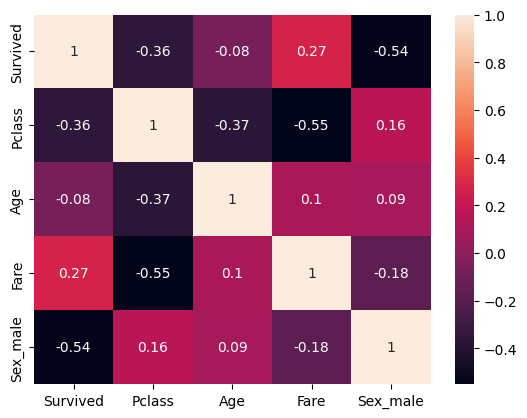

In [ ]:
corr_matrix = data_with_dummies.corr().round(2)  # Round to 2 decimal places
sns.heatmap(data=corr_matrix, annot=True)  # Set annot = True to print the values inside the squares
plt.show()

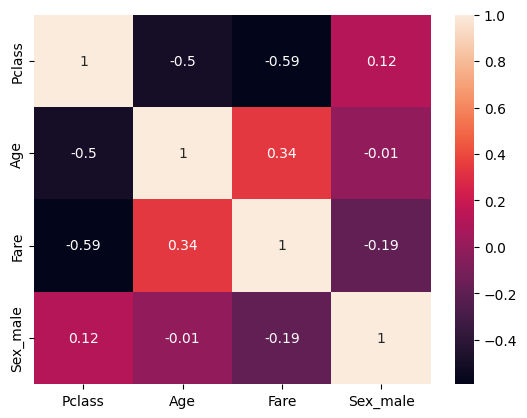

In [ ]:
corr_matrix = data_with_dummies2.corr().round(2)  # Round to 2 decimal places
sns.heatmap(data=corr_matrix, annot=True)  # Set annot = True to print the values inside the squares
plt.show()

In [ ]:
data_no_multicollinearity = data_with_dummies.drop('Fare', axis=1)
data_no_multicollinearity.head()

,Survived,Pclass,Age,Sex_male
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1


In [ ]:
data_no_multicollinearity2 = data_with_dummies.drop('Fare', axis=1)
data_no_multicollinearity2.head()

,Survived,Pclass,Age,Sex_male
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1


In [ ]:
features = data_no_multicollinearity.drop('Survived', axis=1)
label = data_no_multicollinearity['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred = clf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, pred)
acc

0.7692307692307693

In [ ]:
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted Women', 'Predicted Men'],
        index=['Actual Women', 'Actual Men'])
matrix

,Predicted Women,Predicted Men
Actual Women,74,12
Actual Men,21,36


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        86
           1       0.75      0.63      0.69        57

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.77      0.77      0.77       143

